# Daten und Modelloptimierung - Teil 2

## Quelle der Daten

https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data (zuletzt aufgerufen: 01/2024)

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29 (zuletzt aufgerufen: 01/2024)

## Installation der Bibliotheken

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import StratifiedKFold

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

## Einlesen der Daten

In [3]:
data = pd.read_excel("C:\\Users\\Tim\\Desktop\\Buchprojekt KI Medizin\\Programmierung\\Brustkrebs.xlsx", sheet_name = "Tabelle1")

data = data.dropna()

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
diagnosis_new = {"benign": 0, "malignant": 1}

data["diagnosis"] = data["diagnosis"].replace(diagnosis_new)

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Aufteilung der Daten

In [5]:
x = data.iloc[:, 1:]

y = data.iloc[:, 0]

In [6]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

## Principal Component Analysis

In [8]:
scaler = StandardScaler()

scaler.fit(x)

scaled_data = scaler.transform(x)

In [9]:
pca = PCA(n_components = 15)

pca.fit(scaled_data)

PCA(n_components=15)

Text(0, 0.5, 'Variance Explained')

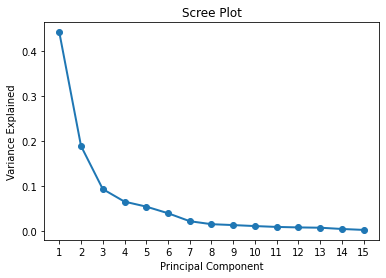

In [10]:
PC_values = np.arange(pca.n_components_) + 1

plt.plot(PC_values, pca.explained_variance_ratio_, "o-", linewidth = 2)
plt.xticks(np.arange(1, len(PC_values)+1, 1))

plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")

In [11]:
pca = PCA(n_components = 3)

pca.fit(scaled_data)

PCA(n_components=3)

Text(0, 0.5, 'Variance Explained')

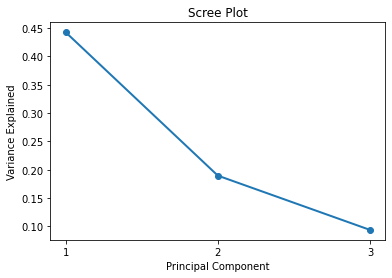

In [12]:
PC_values = np.arange(pca.n_components_) + 1

plt.plot(PC_values, pca.explained_variance_ratio_, "o-", linewidth = 2)
plt.xticks(np.arange(1, len(PC_values)+1, 1))

plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")

In [13]:
x_pca = pca.transform(scaled_data)

print(x_pca)

[[ 9.19283683  1.94858309 -1.12316601]
 [ 2.3878018  -3.76817172 -0.52929253]
 [ 5.73389628 -1.0751738  -0.55174761]
 ...
 [ 1.25617928 -1.90229672  0.56273046]
 [10.37479406  1.6720101  -1.87702936]
 [-5.4752433  -0.67063677  1.49044326]]


Text(0, 0.5, 'PC2')

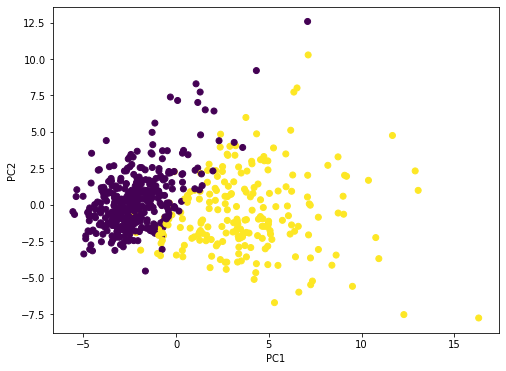

In [14]:
plt.figure(figsize = (8,6))

plt.scatter(x_pca[:,0],x_pca[:,1], c = data["diagnosis"])

plt.xlabel("PC1")
plt.ylabel("PC2")

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size = 0.15)

## Erstellen, Trainieren und Evaluieren des KI-Modells

In [16]:
model_1 = tf.keras.models.Sequential()

model_1.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))
model_1.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
model_1.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))

model_1.add(tf.keras.layers.Dense(2, activation = tf.nn.softmax))

In [17]:
model_2 = tf.keras.models.Sequential()

model_2.add(tf.keras.layers.Dense(64, activation = tf.nn.relu, 
                                kernel_initializer = "he_uniform", 
                                kernel_regularizer = tf.keras.regularizers.L1(0.01),
                                bias_regularizer = tf.keras.regularizers.L2(0.01)))
model_2.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
model_2.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))

model_2.add(tf.keras.layers.Dense(2, activation = tf.nn.softmax))

In [18]:
model_1.compile(optimizer = "SGD",
              loss = "sparse_categorical_crossentropy",
              metrics = "accuracy")

In [19]:
model_1.fit(x_train, y_train, epochs = 5)

Epoch 1/5
16/16 [==============================] - 1s 2ms/step - loss: 0.5543 - accuracy: 0.8882
Epoch 2/5
16/16 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.9358
Epoch 3/5
16/16 [==============================] - 0s 2ms/step - loss: 0.3063 - accuracy: 0.9358
Epoch 4/5
16/16 [==============================] - 0s 2ms/step - loss: 0.2543 - accuracy: 0.9420
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 0.2209 - accuracy: 0.9420


In [20]:
model_1.evaluate(x_test, y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.2166 - accuracy: 0.9651


[0.2165844440460205, 0.9651162624359131]

## Hyperparameter-Optimierung mit Random Search

In [21]:
def create_model(optimizer = "SGD", loss = "sparse_categorical_crossentropy", neurons = 128):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(neurons, activation = tf.nn.relu))
    model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
    model.add(tf.keras.layers.Dense(neurons, activation = tf.nn.relu))
    
    model.add(tf.keras.layers.Dense(2, activation = tf.nn.softmax))

    model.compile(optimizer = optimizer, loss = loss, metrics = ["accuracy"])
    
    return model

In [22]:
model_1 = KerasClassifier(build_fn = create_model, verbose = 0)

C:\Users\Tim\AppData\Local\Temp/ipykernel_8240/3039951382.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_1 = KerasClassifier(build_fn = create_model, verbose = 0)


In [23]:
param_dist = {
    "neurons": [64, 128],
    "optimizer": ["adam", "SGD"],
    "loss":["sparse_categorical_crossentropy", "MSE"]}

In [24]:
random_search = RandomizedSearchCV(estimator = model_1, param_distributions = param_dist, 
                                   cv = StratifiedKFold(n_splits = 5), n_jobs = -1)
random_search_result = random_search.fit(x, y)  

C:\Users\Tim\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [25]:
print("Best: %f using %s" % (random_search_result.best_score_, 
                             random_search_result.best_params_))

Best: 0.861155 using {'optimizer': 'adam', 'neurons': 64, 'loss': 'sparse_categorical_crossentropy'}


In [26]:
model_3 = tf.keras.models.Sequential()

model_3.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))
model_3.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
model_3.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))

model_3.add(tf.keras.layers.Dense(2, activation = tf.nn.softmax))

model_3.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = "accuracy")

model_3.fit(x_train, y_train, epochs = 5)

Epoch 1/5
16/16 [==============================] - 1s 3ms/step - loss: 0.2788 - accuracy: 0.9275
Epoch 2/5
16/16 [==============================] - 0s 3ms/step - loss: 0.1138 - accuracy: 0.9482
Epoch 3/5
16/16 [==============================] - 0s 4ms/step - loss: 0.1099 - accuracy: 0.9586
Epoch 4/5
16/16 [==============================] - 0s 3ms/step - loss: 0.1054 - accuracy: 0.9482
Epoch 5/5
16/16 [==============================] - 0s 3ms/step - loss: 0.0986 - accuracy: 0.9565


In [27]:
model_3.evaluate(x_test, y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.1210 - accuracy: 0.9767


[0.12101371586322784, 0.9767441749572754]